# SNCF - Analyse de la Fréquentation des gares

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib as mpl
import numpy as np

## Première analyse du dataset : variation de la fréquentation du réseau sur le temps

In [2]:
dataFreq = pd.read_csv('./data/frequentation-gares.csv', delimiter=';')

In [3]:
usersOverYears = dict()
usersOverYears['2015'] = dataFreq['Total Voyageurs 2015'].sum()
usersOverYears['2016'] = dataFreq['Total Voyageurs 2016'].sum()
usersOverYears['2017'] = dataFreq['Total Voyageurs 2017'].sum()
usersOverYears['2018'] = dataFreq['Total Voyageurs 2018'].sum()
usersOverYears['2019'] = dataFreq['Total Voyageurs 2019'].sum()
usersOverYears['2020'] = dataFreq['Total Voyageurs 2020'].sum()
usersOverYearsDf = pd.DataFrame.from_dict(usersOverYears, orient='index')
# rename columns
usersOverYearsDf.index.names = ['Année']
usersOverYearsDf = usersOverYearsDf.rename(columns = {0:'Nombre'})
usersOverYearsDf['Type'] = "Utilisateurs"

In [4]:
allUsersOverYears = dict()
allUsersOverYears['2015'] = dataFreq['Total Voyageurs + Non voyageurs 2015'].sum()
allUsersOverYears['2016'] = dataFreq['Total Voyageurs + Non voyageurs 2016'].sum()
allUsersOverYears['2017'] = dataFreq['Total Voyageurs + Non voyageurs 2017'].sum()
allUsersOverYears['2018'] = dataFreq['Total Voyageurs + Non voyageurs 2018'].sum()
allUsersOverYears['2019'] = dataFreq['Total Voyageurs + Non voyageurs 2019'].sum()
allUsersOverYears['2020'] = dataFreq['Total Voyageurs + Non voyageurs 2020'].sum()
allUsersOverYearsDf = pd.DataFrame.from_dict(allUsersOverYears, orient='index')
# rename columns
allUsersOverYearsDf.index.names = ['Année']
allUsersOverYearsDf = allUsersOverYearsDf.rename(columns = {0:'Nombre'})
allUsersOverYearsDf['Type'] = "Tout utilisateurs"

In [5]:
visitorsOverYears = dict()
visitorsOverYears['2015'] = allUsersOverYears['2015'] - usersOverYears['2015']
visitorsOverYears['2016'] = allUsersOverYears['2016'] - usersOverYears['2016']
visitorsOverYears['2017'] = allUsersOverYears['2017'] - usersOverYears['2017']
visitorsOverYears['2018'] = allUsersOverYears['2018'] - usersOverYears['2018']
visitorsOverYears['2019'] = allUsersOverYears['2019'] - usersOverYears['2019']
visitorsOverYears['2020'] = allUsersOverYears['2020'] - usersOverYears['2020']
visitorsOverYearsDf = pd.DataFrame.from_dict(visitorsOverYears, orient='index')
# rename columns
visitorsOverYearsDf.index.names = ['Année']
visitorsOverYearsDf = visitorsOverYearsDf.rename(columns = {0:'Nombre'})
visitorsOverYearsDf['Type'] = "Visiteurs"

<AxesSubplot: xlabel='Année', ylabel='Nombre'>

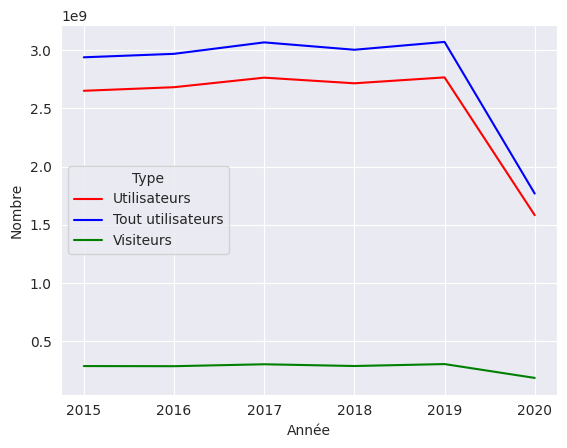

In [6]:
sb.lineplot(data=usersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['r'])
sb.lineplot(data=allUsersOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['b'])
sb.lineplot(data=visitorsOverYearsDf, x='Année', y='Nombre', hue='Type', palette=['g'])

On peut voir que les trois courbes suivent la même tendance :
   - une augmentation régulière de la fréquentation de 2015 à 2019
   - une chute de la fréquentation en 2020

In [7]:
print("Perte d'utilisateur en 2020 : ", ((1-usersOverYears['2020']/usersOverYears['2019'])*100).round(2), '%')
print("Perte de visiteurs en 2020 : ", ((1-visitorsOverYears['2020']/visitorsOverYears['2019'])*100).round(2), '%')

Perte d'utilisateur en 2020 :  42.78 %
Perte de visiteurs en 2020 :  39.03 %


#### Conclusion:
On peut conclure que en 2020 il y a un évènement qui a considérablement réduit la fréquentation du réseau. Cet évènement est sans aucun doute le confinement dû aux restrictions sanitaires liées à la pandémie du Covid-19

## Deuxième analyse du dataset : fréquentation des gares

### de 2015 à 2019

In [8]:
moyUsers = []
for index, row in dataFreq.iterrows():
    moyUsers.append((row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015'])/4)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Voyageurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Voyageurs", value=moyUsers, allow_duplicates=True)

AxesSubplot(0.125,0.11;0.775x0.77)
Nombre de gares :  2967


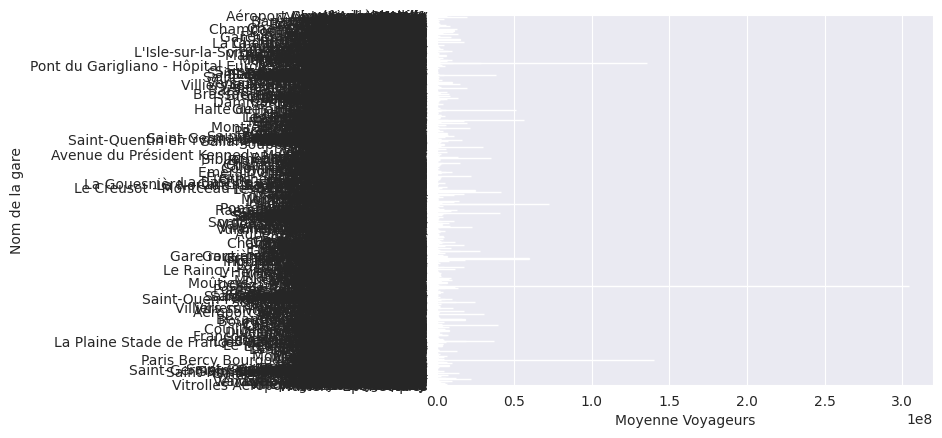

In [9]:
print(sb.barplot(dataFreq, x="Moyenne Voyageurs", y="Nom de la gare"))
print("Nombre de gares : ", len(dataFreq))

Les données de ce graphique sont illisibles, nous allons donc affiner et ne prendre que les valeurs et plus hautes d'un coté et les plus basses de l'autre

<AxesSubplot: xlabel='Moyenne Voyageurs', ylabel='Nom de la gare'>

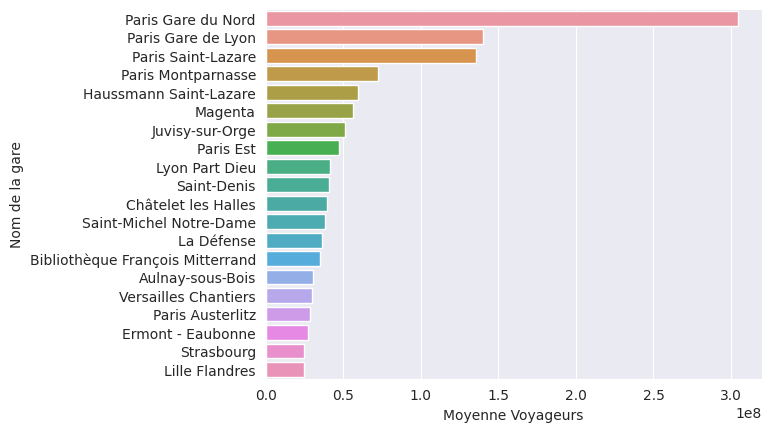

In [10]:
sb.barplot(dataFreq.nlargest(20, "Moyenne Voyageurs") , x="Moyenne Voyageurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Voyageurs', ylabel='Nom de la gare'>

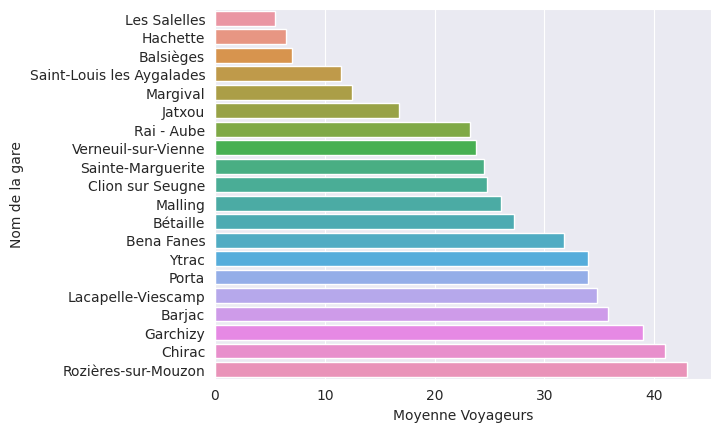

In [11]:
sb.barplot(dataFreq[dataFreq['Moyenne Voyageurs'] > 0].nsmallest(20, "Moyenne Voyageurs"), x="Moyenne Voyageurs", y="Nom de la gare")
# remove closed station with 0 user

In [12]:
moyVisitors = []
for index, row in dataFreq.iterrows():
    sumUsers = row['Total Voyageurs 2019']+row['Total Voyageurs 2018']+row['Total Voyageurs 2017']+row['Total Voyageurs 2016']+row['Total Voyageurs 2015']
    sumAllUsers = row['Total Voyageurs + Non voyageurs 2019']+row['Total Voyageurs + Non voyageurs 2018']+row['Total Voyageurs + Non voyageurs 2017']+row['Total Voyageurs + Non voyageurs 2016']+row['Total Voyageurs + Non voyageurs 2015']
    moyVisitors.append((sumAllUsers-sumUsers)/4)

# condition to avoid duplicate if the cell is reloaded
if not "Moyenne Visiteurs" in dataFreq:
    dataFreq.insert(loc=dataFreq.shape[1], column="Moyenne Visiteurs", value=moyVisitors, allow_duplicates=True)

<AxesSubplot: xlabel='Moyenne Visiteurs', ylabel='Nom de la gare'>

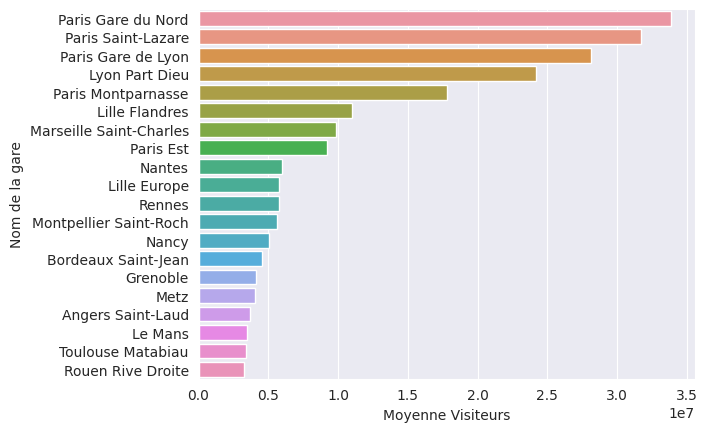

In [13]:
sb.barplot(dataFreq.nlargest(20, "Moyenne Visiteurs"), x="Moyenne Visiteurs", y="Nom de la gare")

<AxesSubplot: xlabel='Moyenne Visiteurs', ylabel='Nom de la gare'>

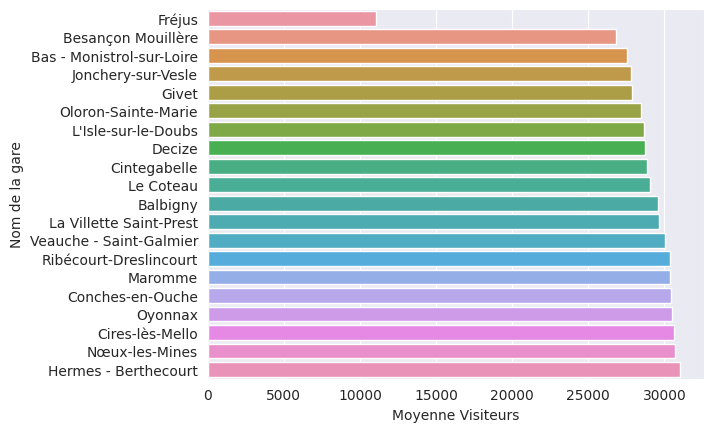

In [14]:
sb.barplot(dataFreq[dataFreq['Moyenne Visiteurs'] > 0].nsmallest(20, "Moyenne Visiteurs"), x="Moyenne Visiteurs", y="Nom de la gare")
# remove closed station with 0 user

## Troisème analyse : Fréquentation par segment DRG

Définition du "segment DRG" :
- Catégorie A : gares de voyageurs d’intérêt national
- Catégorie B : gares de voyageurs d’intérêt régional
- Catégorie C : gares de voyageurs d’intérêt local

In [15]:
GSA = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'A'])
GSB = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'B'])
GSC = len(dataFreq[dataFreq['Segmentation DRG 2021'] == 'C'])
stationCount = len(dataFreq)
pourcentageSegmentData = [str(round(GSA/stationCount*100, 2))+" %", str(round(GSB/stationCount*100, 2))+" %", str(round(GSC/stationCount*100, 2))+" %"]
segmentDf = pd.DataFrame(data={"Segment": ["A", "B", "C"], "Nombre de gare": [GSA, GSB, GSC], "Pourcentage": pourcentageSegmentData})

<AxesSubplot: xlabel='Segment', ylabel='Nombre de gare'>

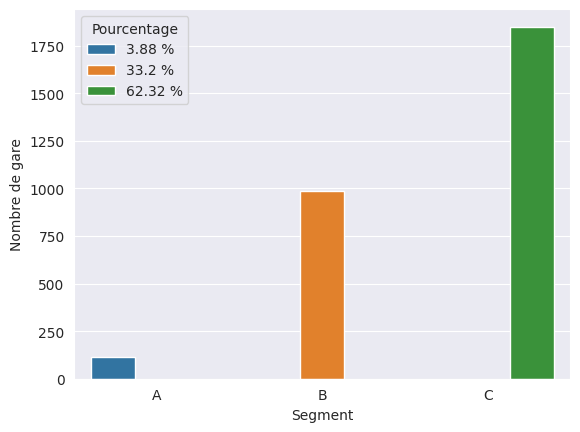

In [16]:
sb.barplot(data=segmentDf, x="Segment", y="Nombre de gare", hue="Pourcentage")